<a href="https://colab.research.google.com/github/Ayon150/AI/blob/main/EffectOfDropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training: No Dropout, No Augmentation
Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7260 - loss: 0.5065 - val_accuracy: 0.8970 - val_loss: 0.2467
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8975 - loss: 0.2415 - val_accuracy: 0.9055 - val_loss: 0.2336
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9327 - loss: 0.1694 - val_accuracy: 0.9300 - val_loss: 0.1810
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9418 - loss: 0.1498 - val_accuracy: 0.9405 - val_loss: 0.1502
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9623 - loss: 0.1021 - val_accuracy: 0.9505 - val_loss: 0.1222
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9703 - loss: 0.0790 - val_accuracy: 0.9525 - val_loss: 0.1337
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9767 - loss: 0.0608 - val_accuracy: 0.9545 - val_loss: 0.1349
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9831 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.7334 - loss: 0.5047 - val_accuracy: 0.8840 - val_loss: 0.2732
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8743 - loss: 0.2979 - val_accuracy: 0.9240 - val_loss: 0.1939
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9061 - loss: 0.2343 - val_accuracy: 0.9305 - val_loss: 0.1677
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9168 - loss: 0.2016 - val_accuracy: 0.9375 - val_loss: 0.1722
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9290 - loss: 0.1774 - val_accuracy: 0.9530 - val_loss: 0.1201
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9436 - loss: 0.1507 - val_accuracy: 0.9590 - val_loss: 0.1155
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9441 - loss: 0.1430 - val_accuracy: 0.9490 - val_loss: 0.1215
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9481 - loss: 0.1364 - val_accu

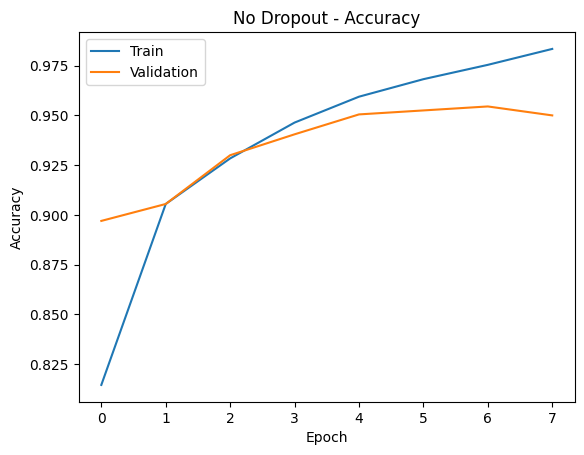

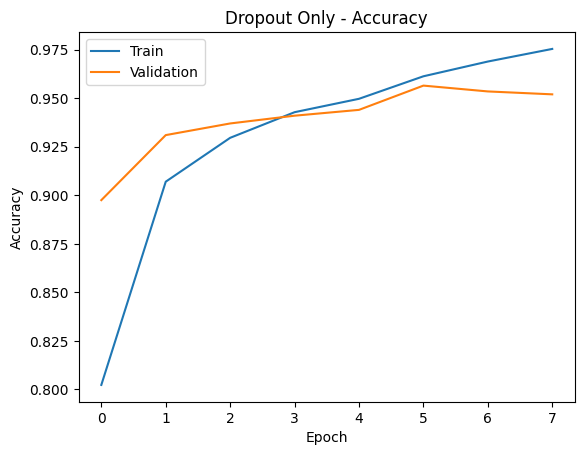

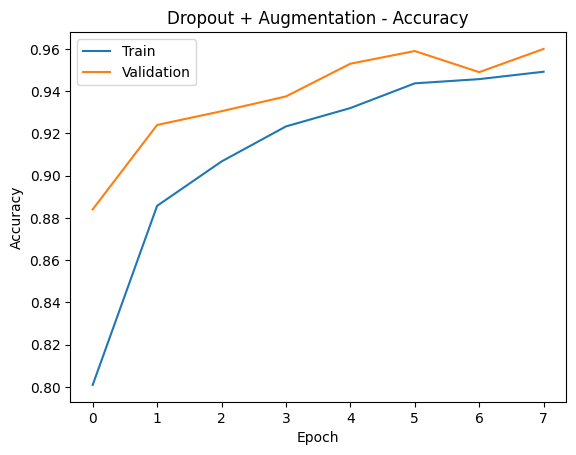

In [1]:
# ============================================================
# Question 13
# Effect of Dropout and Data Augmentation on Overfitting
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import gc

# ------------------------------------------------------------
# 1. Load Dataset (Binary Classification)
# ------------------------------------------------------------

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Use only two classes (0 and 1)
mask_train = (y_train == 0) | (y_train == 1)
mask_test = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[mask_train.flatten()], y_train[mask_train.flatten()]
x_test, y_test = x_test[mask_test.flatten()], y_test[mask_test.flatten()]

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Resize to 64x64 (lighter)
x_train = tf.image.resize(x_train, (64,64))
x_test = tf.image.resize(x_test, (64,64))

# ------------------------------------------------------------
# 2. Build CNN Model
# ------------------------------------------------------------

def build_model(use_dropout=False):

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
    ])

    if use_dropout:
        model.add(layers.Dropout(0.5))   # Dropout Layer

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# ------------------------------------------------------------
# 3. Training Function
# ------------------------------------------------------------

def train_model(model, datagen=None, title=""):
    print(f"\nTraining: {title}")

    if datagen:
        history = model.fit(
            datagen.flow(x_train, y_train, batch_size=32),
            epochs=8,
            validation_data=(x_test, y_test),
            verbose=1
        )
    else:
        history = model.fit(
            x_train, y_train,
            epochs=8,
            batch_size=32,
            validation_data=(x_test, y_test),
            verbose=1
        )

    return history

# ------------------------------------------------------------
# 4. Case 1: No Dropout, No Augmentation
# ------------------------------------------------------------

model1 = build_model(use_dropout=False)
history1 = train_model(model1, None, "No Dropout, No Augmentation")

# ------------------------------------------------------------
# 5. Case 2: With Dropout Only
# ------------------------------------------------------------

model2 = build_model(use_dropout=True)
history2 = train_model(model2, None, "Dropout Only")

# ------------------------------------------------------------
# 6. Case 3: Dropout + Data Augmentation
# ------------------------------------------------------------

datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)

model3 = build_model(use_dropout=True)
history3 = train_model(model3, datagen, "Dropout + Augmentation")

# ------------------------------------------------------------
# 7. Plot Accuracy Curves
# ------------------------------------------------------------

plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("No Dropout - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Dropout Only - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Dropout + Augmentation - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()
